# 01_LUAD_TCGA-MC3-Preprocessing_7Feb22
### Objectives:
1) To manually clean/preprocess raw somatic variants (snv) file derived from LUAD-TCGA-MC3
2) To stepwisely remove silent, non-coding variants and predicted benign variants (SIFT and PolyPhen)

In [1]:
##STEP 1.1: Import required python libraries 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP1: Histrogram plot of 196,952 raw variants and their variant categories
**Source data of somatic variants**

https://xenabrowser.net/datapages/?dataset=mc3%2FLUAD_mc3.txt&host=https%3A%2F%2Ftcga.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443

In [4]:
# open file
df11=pd.read_csv("5.1_LUAD_snv_mc3.txt",sep='\t',header=0)
#len(df11) # 196952 no. of total mutation (original)

df11.rename(columns={'sample': 'sample_id'},inplace=True)
df11.head(1)

,sample_id,chr,start,end,reference,alt,gene,effect,Amino_Acid_Change,DNA_VAF,SIFT,PolyPhen
0,TCGA-05-4244-01,10,101814119,101814119,G,C,CPN1,Missense_Mutation,p.H366D,0.21,deleterious(0),probably_damaging(1)


In [5]:
pd.DataFrame(df11['effect'].sort_values().unique().tolist()) 

,0
0,3'Flank
1,3'UTR
2,5'Flank
3,5'UTR
4,Frame_Shift_Del
5,Frame_Shift_Ins
6,In_Frame_Del
7,In_Frame_Ins
8,Intron
9,Missense_Mutation


In [7]:
def fn3a(df4,columnname,qugene1):
    df44 = df4[df4[columnname].isin(qugene1)]
    df44 = df44.sort_values(by='gene', ascending=True) # sort from (A->Z) of gene names
    return df44 # Return filtered table

In [8]:
# Count the number of variants in each variant category

df12 = df11.copy()

A1 = len(fn3a(df12,'effect',['3\'Flank'])) 
B1 = len(fn3a(df12,'effect',['3\'UTR'])) 
C1 = len(fn3a(df12,'effect',['5\'Flank'])) 
D1 = len(fn3a(df12,'effect',['5\'UTR'])) 
E1 = len(fn3a(df12,'effect',['Frame_Shift_Del'])) 
F1 = len(fn3a(df12,'effect',['Frame_Shift_Ins'])) 
G1 = len(fn3a(df12,'effect',['In_Frame_Del'])) 
H1 = len(fn3a(df12,'effect',['In_Frame_Ins'])) 
I1 = len(fn3a(df12,'effect',['Intron'])) 
J1 = len(fn3a(df12,'effect',['Missense_Mutation'])) 
K1 = len(fn3a(df12,'effect',['Nonsense_Mutation'])) 
L1 = len(fn3a(df12,'effect',['Nonstop_Mutation'])) 
M1 = len(fn3a(df12,'effect',['RNA'])) 
N1 = len(fn3a(df12,'effect',['Silent'])) 
O1 = len(fn3a(df12,'effect',['Splice_Site'])) 
P1 = len(fn3a(df12,'effect',['Translation_Start_Site'])) 
Q1 = len(fn3a(df12,'effect',['large deletion'])) 

data1 = [A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1]
# sum(data1) # 196952 rows, which are equal to len(df11)

data1.sort(reverse=True)
print(data1)

[117318, 41018, 9551, 6973, 4613, 4167, 3897, 3654, 2667, 1091, 706, 552, 353, 197, 157, 33, 5]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

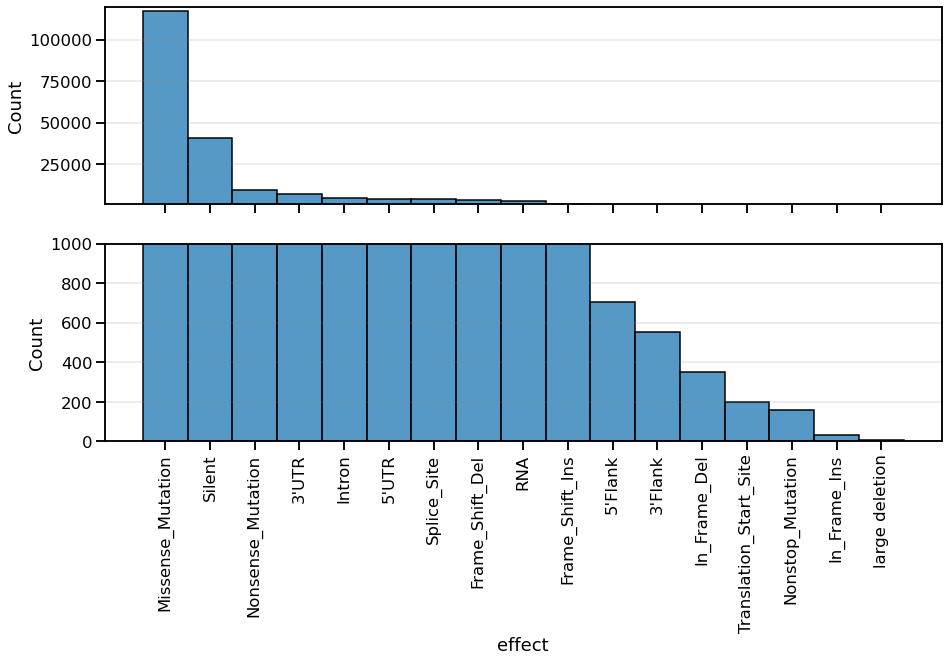

In [9]:
# Custom sort from high to low mutation types 
# Ref: https://towardsdatascience.com/11-tricks-to-master-values-sorting-in-pandas-7f2cfbf19730

from pandas.api.types import CategoricalDtype
eff_order = CategoricalDtype(
    ['Missense_Mutation', 'Silent','Nonsense_Mutation', '3\'UTR', 'Intron', '5\'UTR',
     'Splice_Site','Frame_Shift_Del','RNA','Frame_Shift_Ins','5\'Flank','3\'Flank',
     'In_Frame_Del','Translation_Start_Site','Nonstop_Mutation',
     'In_Frame_Ins','large deletion'], ordered=True)

df12['effect'] = df12['effect'].astype(eff_order)
df13 = df12.sort_values(['effect', 'chr'], ascending=True)


#========================================================================

# Histogram plot with combined all chromosomes, high -> low mutation types
## Ref: https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e

sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(15, 8),sharex=True)
ax = sns.histplot(data=df13, x="effect", palette="colorblind",stat="count", ax=ax1)
ax = sns.histplot(data=df13, x="effect", palette="colorblind",stat="count", ax=ax2)
ax1.set_ylim(1000, 120000)
ax2.set_ylim(0, 1000)
ax1.grid(which='major', axis='y',color='grey', linestyle='-', linewidth=.3)
ax2.grid(which='major', axis='y',color='grey', linestyle='-', linewidth=.3)
plt.xticks(rotation =90)

## STEP2: Merge SNV file with Phenotype (cancer stage)
**Source data of metadata (phenotypes)**

https://xenabrowser.net/datapages/?dataset=TCGA.LUAD.sampleMap%2FLUAD_clinicalMatrix&host=https%3A%2F%2Ftcga.xenahubs.net&removeHub=http%3A%2F%2F127.0.0.1%3A7222

In [10]:
# open metadata file

df21=pd.read_csv("5.2_LUAD_phenoclinicalMatrix",sep='\t',header=0)
# len(df21) = 706 samples

df21.rename(columns={'sampleID': 'sample_id'},inplace=True)
# len(df21.columns.tolist()) # no. of columns = 148

df21.head(2)

,sample_id,ABSOLUTE_Ploidy,ABSOLUTE_Purity,AKT1,ALK_translocation,BRAF,CBL,CTNNB1,Canonical_mut_in_KRAS_EGFR_ALK,Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2,...,_GENOMIC_ID_TCGA_LUAD_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LUAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_LUAD_RPPA_RBN,_GENOMIC_ID_TCGA_LUAD_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LUAD_PDMRNAseq,_GENOMIC_ID_TCGA_LUAD_RPPA,_GENOMIC_ID_TCGA_LUAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LUAD_mutation_broad_gene,_GENOMIC_ID_data/public/TCGA/LUAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LUAD_miRNA_GA
0,TCGA-05-4244-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,e6a101b9-61f9-4ed1-a59f-d9db3fdb4555,NaN,TCGA-05-4244-01A-21-2190-20,e6a101b9-61f9-4ed1-a59f-d9db3fdb4555,TCGA-05-4244-01,59881fe3-70f4-4fa0-9355-f50250872752,e6a101b9-61f9-4ed1-a59f-d9db3fdb4555,TCGA-05-4244-01A-01D-1105-08,NaN,TCGA-05-4244-01
1,TCGA-05-4249-01,3.77,0.46,none,NaN,p.A762E,none,none,Y,Y,...,d1a8d88d-1708-4959-9695-6f2e67853bd5,NaN,TCGA-05-4249-01A-21-2190-20,d1a8d88d-1708-4959-9695-6f2e67853bd5,TCGA-05-4249-01,5b46a235-49a6-43ea-91b6-82a384702477,d1a8d88d-1708-4959-9695-6f2e67853bd5,TCGA-05-4249-01A-01D-1105-08,NaN,TCGA-05-4249-01


In [11]:
# Select only some phenotype columns

df22 = df21.set_index('sample_id')
df23 = df22.iloc[:,0:0] 
df23['pathologic_stage'] = np.array(df22['pathologic_stage'])
df23['pathologic_M'] = np.array(df22['pathologic_M'])
df23['pathologic_N'] = np.array(df22['pathologic_N'])
df23['pathologic_T'] = np.array(df22['pathologic_T'])
df23['tobacco_smoking_history_indicator'] = np.array(df22['tobacco_smoking_history_indicator'])

# Rename column
df23.rename(columns={'pathologic_stage': 'tumor_stage'},inplace=True)

# Make index (sample_id) back into column
df23 = df23.sort_index(ascending=True)
df24 = df23.reset_index()
with pd.option_context('display.max_rows',2): display(df24)

,sample_id,tumor_stage,pathologic_M,pathologic_N,pathologic_T,tobacco_smoking_history_indicator
0,TCGA-05-4244-01,Stage IV,M1,N2,T2,NaN
...,...,...,...,...,...,...
705,TCGA-S2-AA1A-01,Stage IA,M0,N0,T1b,NaN


In [58]:
df25 = df11.copy()
df26 = df25.sort_values(by='sample_id', ascending=True)
df26 = df26.reset_index(drop=True)

# Merge tumor_stage as another attribute to SNV table. 
df27 = df26.merge(df24[['sample_id', 'tumor_stage']],on='sample_id',how='inner')
with pd.option_context('display.max_rows',2): display(df27) # 196952 rows × 12+1 columns

print("Summary before removing NA and Discrepancy in tumor_stage column","\n", 
      "No. of remaining samples:", len(df27['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df27['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df27))

,sample_id,chr,start,end,reference,alt,gene,effect,Amino_Acid_Change,DNA_VAF,SIFT,PolyPhen,tumor_stage
0,TCGA-05-4244-01,10,101814119,101814119,G,C,CPN1,Missense_Mutation,p.H366D,0.21,deleterious(0),probably_damaging(1),Stage IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196951,TCGA-S2-AA1A-01,X,41646450,41646450,G,T,CASK,Missense_Mutation,p.L87I,0.07,tolerated(0.1),benign(0.134),Stage IA


Summary before removing NA and Discrepancy in tumor_stage column 
 No. of remaining samples: 513 
 No. of remaining genes: 18594 
 No. of remaining variants: 196952


In [59]:
# df27.isnull().sum() # NA of tumor_stage = 101

# Step 1: Drop NA in only specified column (tumor_stage)
df28 = df27.dropna(subset=['tumor_stage']) 

# Step 2: Drop rows with specified condition
## Ref: https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/
df28 = df28.loc[df28['tumor_stage'] != '[Discrepancy]']

print("Summary after removing NA and Discrepancy in tumor_stage column","\n", 
      "No. of remaining samples:", len(df28['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df28['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df28))

Summary after removing NA and Discrepancy in tumor_stage column 
 No. of remaining samples: 506 
 No. of remaining genes: 18572 
 No. of remaining variants: 194136


## STEP 3: Remove silent, non-coding mutations and Missense (predicted benign-SIFT&PolyPhen)

### STEP 3.1: Remove silent and non-coding mutations

In [62]:
df31 = df28.copy()

## Drop rows with specified condition. Ref: https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/

# Step 1: Remove silent mutations
df31 = df31.loc[df31['effect'] != 'Silent']

print("Summary after removing silent mutations","\n", 
      "No. of remaining samples:", len(df31['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df31['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df31))

Summary after removing silent mutations 
 No. of remaining samples: 506 
 No. of remaining genes: 18137 
 No. of remaining variants: 153713


In [63]:
# Step 2: Remove non-coding mutations

df32a = df31.loc[df31['effect'] != 'RNA']
df32b = df32a.loc[df31['effect'] != 'Translation_Start_Site']
df32c = df32b.loc[df31['effect'] != 'Intron']
df32d = df32c.loc[df31['effect'] != '5\'UTR']
df32e = df32d.loc[df31['effect'] != '3\'UTR']
df32f = df32e.loc[df31['effect'] != '5\'Flank']
df32g = df32f.loc[df31['effect'] != '3\'Flank']

print("Summary after removing RNA-related mutations","\n", 
      "No. of remaining samples:", len(df32a['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32a['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32a))

print("Summary after removing TSS-related mutations","\n", 
      "No. of remaining samples:", len(df32b['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32b['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32b))

print("Summary after removing intron mutations","\n", 
      "No. of remaining samples:", len(df32c['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32c['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32c))

print("Summary after removing 5\'UTR mutations","\n", 
      "No. of remaining samples:", len(df32d['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32d['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32d))

print("Summary after removing 3\'UTR mutations","\n", 
      "No. of remaining samples:", len(df32e['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32e['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32e))

print("Summary after removing 5\'Flank mutations","\n", 
      "No. of remaining samples:", len(df32f['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32f['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32f))

print("Summary after removing 3\'Flank mutations","\n", 
      "No. of remaining samples:", len(df32g['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df32g['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df32g))

Summary after removing RNA-related mutations 
 No. of remaining samples: 506 
 No. of remaining genes: 17678 
 No. of remaining variants: 151078
Summary after removing TSS-related mutations 
 No. of remaining samples: 506 
 No. of remaining genes: 17673 
 No. of remaining variants: 150884
Summary after removing intron mutations 
 No. of remaining samples: 506 
 No. of remaining genes: 17516 
 No. of remaining variants: 146336
Summary after removing 5'UTR mutations 
 No. of remaining samples: 506 
 No. of remaining genes: 17360 
 No. of remaining variants: 142218
Summary after removing 3'UTR mutations 
 No. of remaining samples: 505 
 No. of remaining genes: 17082 
 No. of remaining variants: 135320
Summary after removing 5'Flank mutations 
 No. of remaining samples: 505 
 No. of remaining genes: 16998 
 No. of remaining variants: 134623
Summary after removing 3'Flank mutations 
 No. of remaining samples: 505 
 No. of remaining genes: 16912 
 No. of remaining variants: 134073


### STEP 3.2: Predicted benign variants based on SIFT and PolyPhen2

In [82]:
df33 = df32g.copy()
df33[['SIFT','PolyPhen']] # Types of SIFT,PolyPhen followed by scores

,SIFT,PolyPhen
0,deleterious(0),probably_damaging(1)
1,tolerated(0.34),benign(0.002)
2,tolerated(0.09),probably_damaging(0.994)
3,deleterious(0.02),probably_damaging(1)
5,tolerated(0.43),benign(0.001)
...,...,...
196947,NaN,NaN
196948,deleterious(0),probably_damaging(1)
196949,NaN,NaN
196950,deleterious_low_confidence(0),possibly_damaging(0.682)


In [71]:
# Count unique types of SIFT,PolyPhen regardless of scores

lst11 = df33['SIFT'].dropna().unique().tolist() # len(lst11) = 204
lst12 = []
for i in list(range(len(lst11))): 
    lst12.append(lst11[i].split('(')[0])  #len(lst12) = 204, which is equal to len(lst11)
    
lst13 = df33['PolyPhen'].dropna().unique().tolist() # len(lst13) = 1002
lst14 = []
for i in list(range(len(lst13))): 
    lst14.append(lst13[i].split('(')[0])  #len(lst14) = 1002, which is equal to len(lst13)
    
print("The unique sets of SIFT and PolyPhen are:","\n", 
      "SIFT:", set(lst12),"\n",   
      "PolyPhen:", set(lst14),"\n")

The unique sets of SIFT and PolyPhen are: 
 SIFT: {'deleterious_low_confidence', 'deleterious', 'tolerated', 'tolerated_low_confidence'} 
 PolyPhen: {'benign', 'possibly_damaging', 'unknown', 'probably_damaging'} 



In [83]:
# Split scores of SIFT,PolyPhen from their catagories

## Pandas Apply lambda function null values: https://stackoverflow.com/questions/37060385/pandas-apply-lambda-function-null-values

df33['SIFT2'] = df33['SIFT'].apply(lambda x: 'NA' if pd.isnull(x) else x.split('(')[0])
df33['PolyPhen2'] = df33['PolyPhen'].apply(lambda x: 'NA' if pd.isnull(x) else x.split('(')[0])

df33.iloc[0:2,[0,10,11,12,13,14]]

,sample_id,SIFT,PolyPhen,tumor_stage,SIFT2,PolyPhen2
0,TCGA-05-4244-01,deleterious(0),probably_damaging(1),Stage IV,deleterious,probably_damaging
1,TCGA-05-4244-01,tolerated(0.34),benign(0.002),Stage IV,tolerated,benign


### STEP3.3 :Drop rows where SIFT and PolyPhen scores have low condifence

In [84]:
# Drop rows based on multiple conditions on a column
# https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Step 1: Create index of low condifence
index_tol_ben = df33[(df33['SIFT2'] =='tolerated') & (df33['PolyPhen2']=='benign')].index
index_tol_unk = df33[(df33['SIFT2'] =='tolerated') & (df33['PolyPhen2']=='unknown')].index
index_tollow_ben = df33[(df33['SIFT2'] =='tolerated_low_confidence') & (df33['PolyPhen2']=='benign')].index
index_tollow_unk = df33[(df33['SIFT2'] =='tolerated_low_confidence') & (df33['PolyPhen2']=='unknown')].index

# Step 2: Drop those created index
df33.drop(index_tol_ben, inplace = True) 
df33.drop(index_tol_unk, inplace = True) 
df33.drop(index_tollow_ben, inplace = True) 
df33.drop(index_tollow_unk, inplace = True) 

print("Summary after removing predicted benign with SIFT and PolyPhen low confidence ","\n", 
      "No. of remaining samples:", len(df33['sample_id'].unique().tolist()),"\n",
      "No. of remaining genes:", len(df33['gene'].unique().tolist()),"\n",
      "No. of remaining variants:", len(df33))

Summary after removing predicted benign with SIFT and PolyPhen low confidence  
 No. of remaining samples: 505 
 No. of remaining genes: 16057 
 No. of remaining variants: 101757


In [85]:
# Export pre-processed snv files
df33.to_csv('./output/6.2_LUAD_snv_mc3_OUT_cleaned_cSIF.tsv', sep="\t",index=False)  

## Step 4: Convert snv file to a pivot table (0, 1)

In [86]:
# open cleaned snv file
df41 = pd.read_csv("./output/6.2_LUAD_snv_mc3_OUT_cleaned_cSIF.tsv",sep='\t',header=0)
df41.head(1)

,sample_id,chr,start,end,reference,alt,gene,effect,Amino_Acid_Change,DNA_VAF,SIFT,PolyPhen,tumor_stage,SIFT2,PolyPhen2
0,TCGA-05-4244-01,10,101814119,101814119,G,C,CPN1,Missense_Mutation,p.H366D,0.21,deleterious(0),probably_damaging(1),Stage IV,deleterious,probably_damaging


In [87]:
# Drop unused multiple columns, remaining only 'gene' and 'tumor_stage' columns
df42=df41.drop(['chr','start','end','reference','alt','effect','Amino_Acid_Change','DNA_VAF',
               'SIFT','PolyPhen','SIFT2','PolyPhen2'],axis=1)

with pd.option_context('display.max_rows',2): display(df42) # 101757 rows × 3 columns

,sample_id,gene,tumor_stage
0,TCGA-05-4244-01,CPN1,Stage IV
...,...,...,...
101756,TCGA-S2-AA1A-01,C17orf77,Stage IA


In [88]:
# Step 1: Make index from multi-columns:
df43 = df42.set_index(['tumor_stage', 'sample_id'])
df43 = df43.sort_index(ascending=True)

# Step 2: Make pivot table using gene as columns:
df43['COUNT'] = 1
df44= df43.pivot_table('COUNT', index=(['tumor_stage', 'sample_id']),columns="gene").fillna(0)
df44 = pd.DataFrame(df44)

with pd.option_context('display.max_rows',2): display(df44) # -->  505 samples and 16057 genes

## Ref: Convert pandas dataframe into a matrix of 1's and 0's for presence/absence
# https://stackoverflow.com/questions/65279846/convert-pandas-dataframe-into-a-matrix-of-1s-and-0s-for-presence-absence
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

,gene,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
tumor_stage,sample_id,,,,,,,,,,,,,,,,,,,,,
Stage I,TCGA-49-AARQ-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stage IV,TCGA-MP-A4T7-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# Export pivot table to tsv file
df44.to_csv('./output/6.3_LUAD_snv_mc3_OUT_cleaned_cSIF_pivot_16057genes.tsv', sep="\t",index=True)  